In [1]:
%env KERAS_BACKEND = tensorflow
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD

from keras.utils import np_utils

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [2]:
from PIL import Image

In [3]:
import os
import glob
import numpy as np
import keras
from keras.preprocessing.image import  img_to_array, load_img
from PIL import Image
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
#%%
dict_labels = {}
size = (128,128) #由於原始資料影像大小不一，因此制定一個統一值
nbofdata=20  #從各個資料夾中抓取特定數量的檔案
#%% Read Traget Folders' Path
labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37']
base_path = r'C:\Users\史勝霖\Desktop\code\AI summer\38 class classification Images\train'
layers_of_folders=1
folder_list=[]
if base_path :
    folder_layers=[]
    files = os.scandir(base_path)
    first_folder = []
    first_folder_kind = []
    for entry in files:
        if entry.is_dir():
            first_folder.append(entry.path)
            first_folder_kind.append(entry.name)
    folder_layers.append(first_folder_kind)
    folder_list.append(first_folder)

datanumber=nbofdata
blob=[]
blob_nparray=[]
image_data=[]
conc = 0
labels_dict={}
for entry1 in folder_list[layers_of_folders - 1]:
    blob = []
    cellname = os.path.basename(os.path.dirname(entry1))  # extract cell name
    #print(cellname)
    concnames = os.path.basename(entry1)  # extract concentration
    #print(concnames)
    if concnames in labels:
        labels_dict[conc] = concnames
        fnamelist = glob.glob(os.path.join(entry1, '*.jpg'))
        for filename in fnamelist[0:datanumber]:
            im = Image.open(filename)
            if im is not None:
                if im.mode=='RGB':
                    im=im.resize(size,Image.BILINEAR)
                    imarray = np.array(im)
                    blob.append(imarray)
#         ind = np.reshape(np.arange(1, len(blob) + 1), (-1, 1))
#         blob_nparray = np.reshape(np.asarray(blob), (len(blob), blob[1].size))
#         blob_nparray = np.hstack((blob_nparray, ind, conc * np.ones((len(blob), 1))))
        image_data.append(blob)
        print(concnames+'  finished!')
        conc += 1


0  finished!
1  finished!
10  finished!
11  finished!
12  finished!
13  finished!
14  finished!
15  finished!
16  finished!
17  finished!
18  finished!
19  finished!
2  finished!
20  finished!
21  finished!
22  finished!
23  finished!
24  finished!
25  finished!
26  finished!
27  finished!
28  finished!
29  finished!
3  finished!
30  finished!
31  finished!
32  finished!
33  finished!
34  finished!
35  finished!
36  finished!
37  finished!
4  finished!
5  finished!
6  finished!
7  finished!
8  finished!
9  finished!


In [4]:
image_data[1][0].shape

(128, 128, 3)

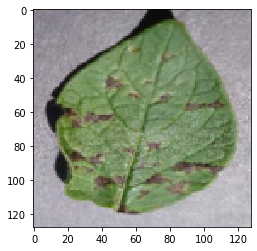

In [5]:
plt.imshow(image_data[13][0])
plt.show()

In [6]:
label = list(range(0,38))

In [7]:
label[0]

0

In [8]:
data = list(range(0,38))
label = [0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,31,32,33,34,35,36,37,4,5,6,7,8,9]
train_data=[]
train_label = []

for i in data:
    for j in range(0,len(image_data[i][:])):
       
        train_data.append(image_data[i][j])
    
    
        train_label.append(label[i])
   



In [9]:
train_label[20]

1

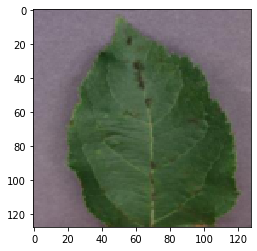

In [10]:
plt.imshow(train_data[0])
plt.show()

In [11]:
train_data = np.array(train_data)
train_label = np.array(train_label)

In [12]:
train_label = np_utils.to_categorical(train_label,38)

In [13]:
train_data.shape

(760, 128, 128, 3)

In [14]:
train_label.shape

(760, 38)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop
# Generate model
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128,128,3),padding='same',name='block1_conv2_1'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',name='block1_conv2_2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block1_MaxPooling'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',name='block2_conv2_1'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',name='block2_conv2_2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block2_MaxPooling'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu',name='final_output_1'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',name='final_output_2'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='sigmoid',name='class_output'))

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])
EStop = EarlyStopping(monitor='val_acc', min_delta=0,patience=10, verbose=1, mode='auto')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
#%% Start Traning Model
history = model.fit(train_data, train_label, batch_size=150, epochs=4, validation_split=0.2)
#%%

Instructions for updating:
Use tf.cast instead.
Train on 608 samples, validate on 152 samples
Epoch 1/4
608/608 [==============================] - 52s 86ms/step - loss: 6.4986 - acc: 0.5544 - val_loss: 4.7632 - val_acc: 0.6944
Epoch 2/4
608/608 [==============================] - 46s 76ms/step - loss: 6.0210 - acc: 0.6097 - val_loss: 3.4359 - val_acc: 0.7323
Epoch 3/4
608/608 [==============================] - 46s 76ms/step - loss: 5.7592 - acc: 0.6234 - val_loss: 3.2695 - val_acc: 0.7479
Epoch 4/4
608/608 [==============================] - 46s 76ms/step - loss: 5.2123 - acc: 0.6379 - val_loss: 0.7419 - val_acc: 0.7277


In [17]:
score = model.evaluate(test_data,test_label)
print('loss:',score[0])
print('acc:',score[1])

NameError: name 'test_data' is not defined

In [21]:
model_json = model.to_json()
open('病蟲害_model_.json','w').write(model_json)
model.save_weights('病蟲害_weights_.h5')